# All the functionality, only inbuilt libraries + plotting ones

In [12]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
from copy import deepcopy
sns.set()

In [13]:
def pseudo_exponential(lambda_):
    x = random.uniform(0,1)
    return -(1/lambda_)*math.log(x)

In [14]:
def std(X):
    expectation = mean(X)
    return math.sqrt(sum([(i-expectation)**2 for i in X])/(len(X)-1))

In [15]:
def mean(X):
    return (1/len(X))*sum(X)

In [16]:
def plot_histogram(histogram_values, intervals, title=''):
    """
    given histogram values, plots it as a bar
    """
    n = sum([len(i) for i in histogram_values])
    n_values = [len(i)/n for i in histogram_values]
    plt.figure(figsize=(12,12))
    plt.title(title)
    plt.bar(intervals, n_values)

In [35]:
def merge_bad_bins(histogram_values, intervals):
    """
    merges bad bins, which contain number of values lower than 5
    """
    bad_bins = []
    bad_bins_idx = []
    for c, bin_ in enumerate(histogram_values):
        if len(bin_)<5:
            bad_bins.append(histogram_values[c])
            bad_bins_idx.append(c)
            
    if not bad_bins:
        return histogram_values, intervals
    
    bad_bins_flattened = [z for i in bad_bins for z in i]
    if len(bad_bins_flattened)//5>1 and len(bad_bins_flattened)>5:
        new_bins = [bad_bins_flattened[i:i+5] for i in range(0, len(bad_bins_flattened),5)]
    else:
        new_bins = [bad_bins_flattened]
    histogram_values = [i for c,i in enumerate(histogram_values) if not c in bad_bins_idx]
    intervals = [i for c,i in enumerate(intervals) if not c in bad_bins_idx]
    for bin_ in new_bins:
        histogram_values.append(bin_)
        intervals.append(max(bin_))
    return histogram_values, intervals

In [36]:
def calc_hist(distribution, k=20):
    max_val, min_val = max(distribution), min(distribution)
    h = (max_val-min_val)/k
    new_h = 0
    intervals = []
    for period in range(k):
        new_h+=h
        intervals.append(new_h)
        
    if intervals[-1]>max_val:
        invervals[-1]=max_val
        
    distribution = sorted(distribution)
    intervals = sorted(intervals)
    histogram_values = []
    
    counter1=0
    counter2=0
    while counter1<len(intervals):
        tmp=[]
        for idx in range(counter2, len(distribution)):
            value = distribution[idx]
            if counter1>0:
                rule = value>intervals[counter1-1] and value<=intervals[counter1]
            else:
                rule = value<=intervals[counter1]
                
            if rule:
                tmp.append(value)
            else:
                break
                
        histogram_values.append(tmp)
        counter2 = idx
        counter1+=1
    
    if sum([len(i) for i in histogram_values])==9999:
        tmp = histogram_values[-1]
        tmp.append(distribution[-1])
        histogram_values[-1] = tmp
    
   
    histogram_values, intervals = merge_bad_bins(histogram_values, intervals)
    
    return histogram_values, intervals
        

In [37]:
def calc_theoretical_hist_height(intervals, lambda_, n=10000):
    copy_intervals = deepcopy(intervals)
    counter = 0
    theoretical_hist_height = []
    copy_intervals.insert(0,0)
    while counter<len(copy_intervals)-1:
        val = math.e**(-lambda_*copy_intervals[counter])-math.e**(-lambda_*copy_intervals[counter+1])
        theoretical_hist_height.append(val)
        counter+=1
    theoretical_hist_height = [int(i*n) for i in theoretical_hist_height]
    return theoretical_hist_height

In [38]:
def calc_gmurman_criteria(histogram_values_pseudo, theoretical_height):
    n = [len(i) for i in histogram_values_pseudo]
    criteria = 0
    for i in range(len(n)):
        try:
            squared_diff = (n[i]-theoretical_height[i])**2
            criteria+=squared_diff/theoretical_height[i]
        except:
            criteria+=0
    return criteria

# Running experiments

In [39]:
lambda_list = [0.5, 1, 1.5, 2, 3]

Experiment 0, lambda parameter : 0.5
Pseudo distribution despersion : 0.04627343263463616, mean : 0.4986861319090249
Calculated lambda for exponential distribution : 4.648728056218465
Criteria : 99570.4828826195, steps of freedom : 18


Experiment 1, lambda parameter : 1
Pseudo distribution despersion : 0.011380783839334909, mean : 0.25176442525778187
Calculated lambda for exponential distribution : 9.373761786152324
Criteria : 111509.22439631542, steps of freedom : 18


Experiment 2, lambda parameter : 1.5
Pseudo distribution despersion : 0.005154582701941061, mean : 0.16655354397163127
Calculated lambda for exponential distribution : 13.928464576292404
Criteria : 99810.44855807917, steps of freedom : 18


Experiment 3, lambda parameter : 2
Pseudo distribution despersion : 0.002890301685283196, mean : 0.12452109791445774
Calculated lambda for exponential distribution : 18.600662464712872
Criteria : 102152.39471963288, steps of freedom : 18


Experiment 4, lambda parameter : 3
Pseudo d

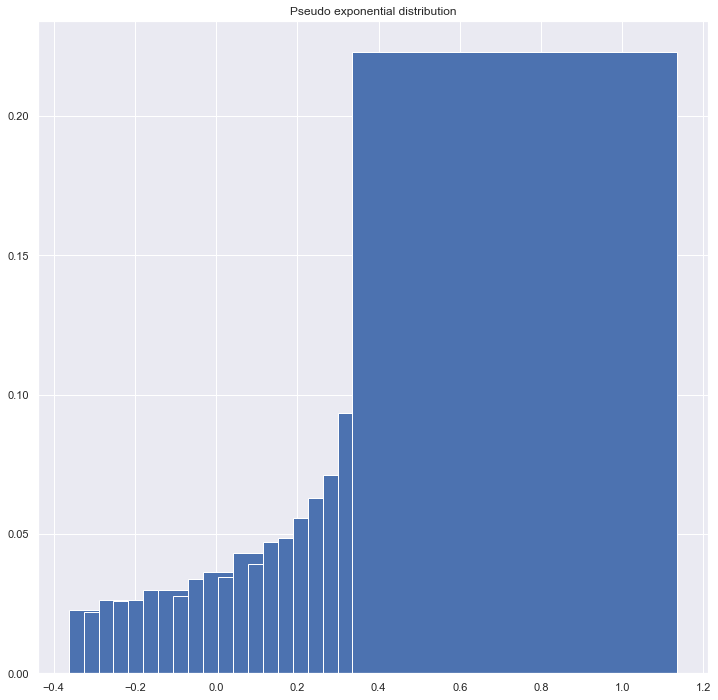

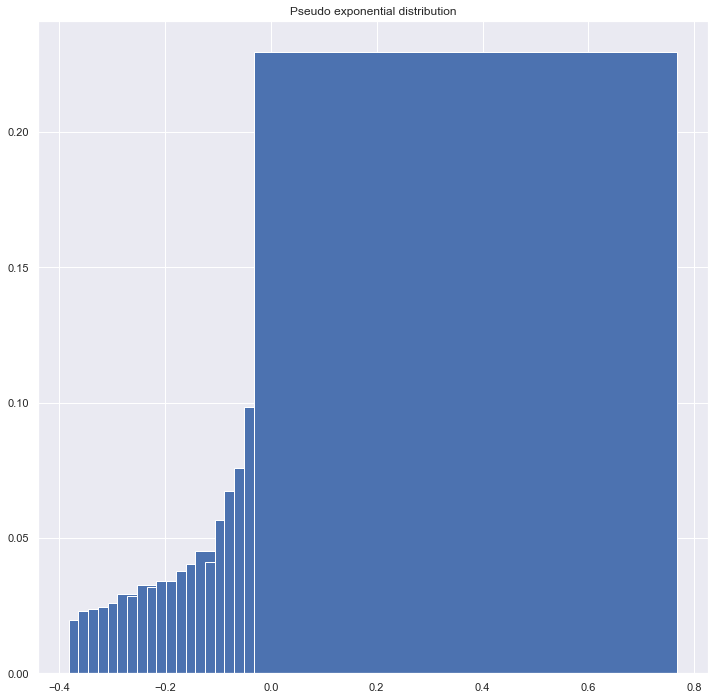

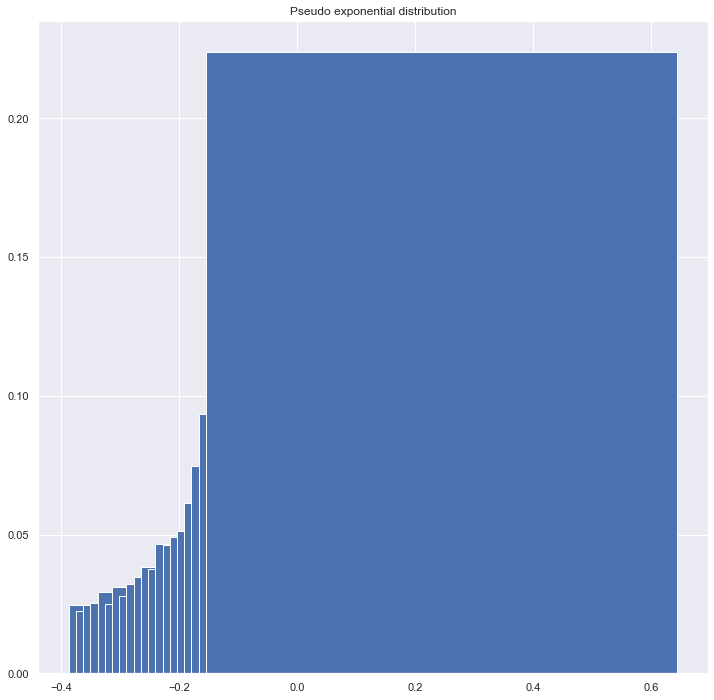

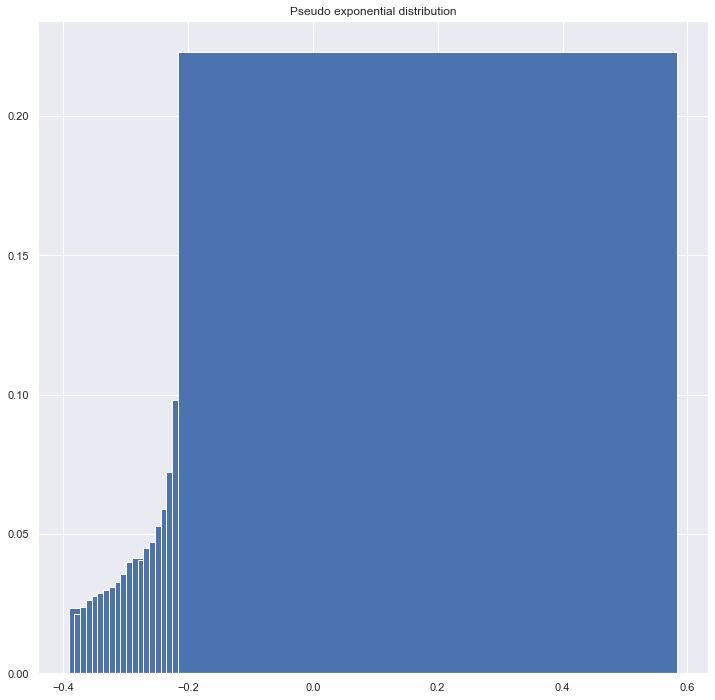

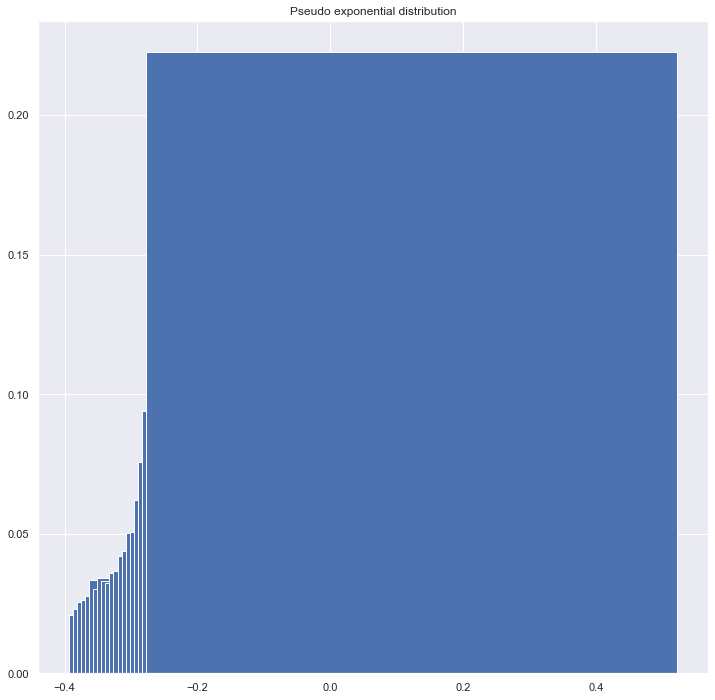

In [40]:
for c,lambda_ in enumerate(lambda_list):
    print('Experiment {}, lambda parameter : {}'.format(c,lambda_))
    pseudo_distribution = [pseudo_exponential(lambda_) for i in range(10000)]
    histogram_values_pseudo, intervals_pseudo = calc_hist(pseudo_distribution, k=20)
    plot_histogram(histogram_values_pseudo, intervals_pseudo,'Pseudo exponential distribution')
    std_pseudo_distribution, mean_pseudo_distribution = std(pseudo_distribution), mean(pseudo_distribution)
    print('Pseudo distribution despersion : {}, mean : {}'.format(std_pseudo_distribution**2, mean_pseudo_distribution))
    lambda_exponent = 1/std_pseudo_distribution
    print('Calculated lambda for exponential distribution : {}'.format(lambda_exponent))
    theoretical_height = calc_theoretical_hist_height(intervals_pseudo, lambda_exponent)
    criteria= calc_gmurman_criteria(histogram_values_pseudo, theoretical_height)
    print('Criteria : {}, steps of freedom : {}'.format(criteria, len(theoretical_height)-2))
    print('\n')